### Estimate parameters by iteratively performing maximum likelihood estimation using the calculated clean map.

In [ ]:
include("../src/function/original_delta_map.jl")
include("../src/function/r_estimate_original.jl")
include("../src/function/set_data_model.jl")
using PyCall
using PyPlot
# set parameters
freq_bands = [40, 60, 140]
freq_bands = [40, 60, 140, 235, 280, 337]
cmb_freq = 140
which_model = "d1 and s1"
r_input = 0.001
seed = 2
nside = 4
num_I = 2  
cov_mat_scal = npzread("../covariance_matrix/smoothing_cov_mat_scal.npy")
cov_mat_tens = npzread("../covariance_matrix/smoothing_cov_mat_tens.npy")
mask_path = "../mask_p06_Nside4.v2.fits"
mask = hp.read_map(mask_path);
N⁻¹_set = Matrix{Float64}[]  
Q_map = Vector{Vector{Float64}}()  
U_map = Vector{Vector{Float64}}()  
r_est = 0.

# definite SetParams and FitParams struct
set_params = SetParams(freq_bands, which_model, r_input, cmb_freq, seed, nside, cov_mat_scal, cov_mat_tens, mask, Q_map, U_map, N⁻¹_set)
fit_params = FitParams(-3, 1.5, 20.1, r_est);

In [4]:
make_input_map!(set_params);

In [5]:
iterative_minimization(set_params, fit_params)

Iteration 1: r = 0.0007823217332444954, Likelihood = -2364.37748641799
delta_like = 1.0000002364377487e10
delta_r = 0.0007823217332444954


/opt/anaconda3/envs/fg_env/lib/python3.12/site-packages/iminuit/minuit.py:2944: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  fm = migrad(ncall, tolerance)
sys:1: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 


Iteration 2: r = 0.0007539342664238946, Likelihood = -2368.3883565845804
delta_like = 4.010870166590394
delta_r = 2.8387466820600782e-5
Iteration 3: r = 0.0007539983703935826, Likelihood = -2368.3889609958246
delta_like = 0.0006044112442395999
delta_r = 6.410396968803411e-8


In [7]:
num_seeds = 10
@time r_dis, beta_s_dis, beta_d_dis, T_d_dis = estimate_r_distribution(set_params, fit_params, num_seeds);

Iteration 1: r = 0.0006326476159049799, Likelihood = -2381.3787976919302
delta_like = 1.0000002381378798e10
delta_r = 0.00012135075448860277
Iteration 2: r = 0.0006283316470364064, Likelihood = -2381.388065773566
delta_like = 0.009268081635582348
delta_r = 4.315968868573439e-6
Iteration 1: r = 0.0007539985593392751, Likelihood = -2368.3889653496126
delta_like = 1.0000002368388966e10
delta_r = 1.889456924253352e-10
Iteration 2: r = 0.0007539952076937584, Likelihood = -2368.388965547093
delta_like = 1.9748040358535945e-7
delta_r = 3.351645516680435e-9
Iteration 1: r = 0.0005287219941321197, Likelihood = -2403.097496715827
delta_like = 1.0000002403097496e10
delta_r = 0.0002252763762614629
Iteration 2: r = 0.0005259647526383304, Likelihood = -2403.113525301181
delta_like = 0.016028585353978997
delta_r = 2.7572414937893086e-6
Iteration 3: r = 0.0005259273365325057, Likelihood = -2403.113647294854
delta_like = 0.0001219936730194604
delta_r = 3.741610582475019e-8
Iteration 1: r = 0.0010647829

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


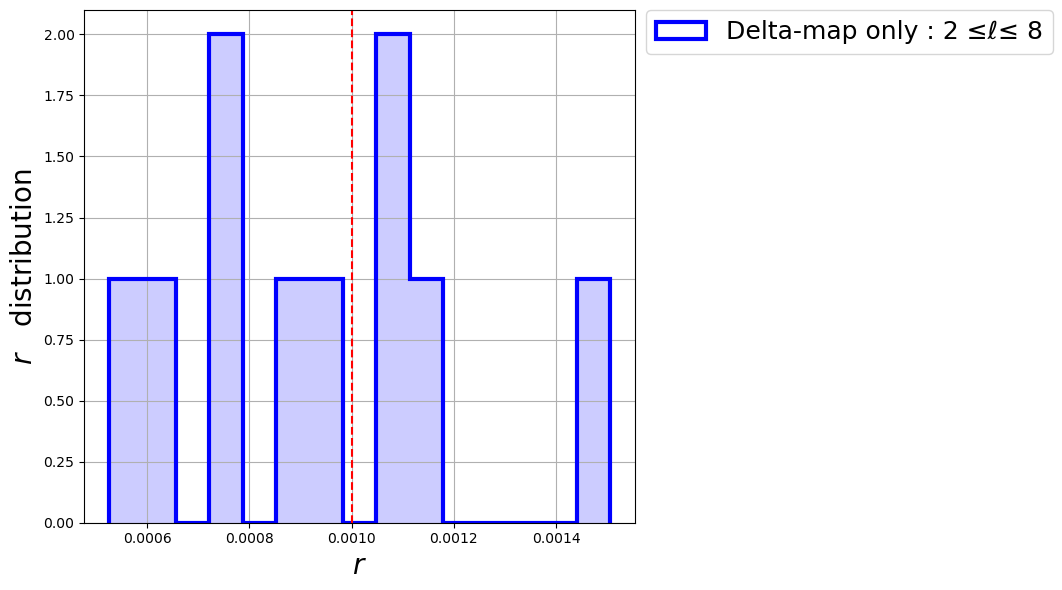

In [8]:
figure(figsize=(8, 6))
hist(r_dis, bins=15, alpha=0.2, color="blue", histtype="stepfilled")
hist(r_dis, bins = 15, alpha = 1., edgecolor = "blue", label = "Delta-map only : 2 ≤ℓ≤ 8", histtype = "step", linewidth = 3)
axvline(x = r_input, color = "red", linestyle = "--")
xlabel(L"$r$", fontsize=20)
ylabel(L"$r\quad$distribution", fontsize=20)  
plt.grid(true)
legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0., fontsize="18")
tight_layout()
subplots_adjust(right=0.8)
show()

In [9]:
mean(r_dis)

0.0009341013329579928

In [10]:
mean(beta_s_dis)

-2.9298004479255058